In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

# 1. Use pandas to get some insights into the data

In [2]:
# Load the data
data = pd.read_csv("house_rental_data.csv")

# Print the head of the data
print(data.head())

   Column1      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  Price
0        1  1177.698      2           7        2            2         2  62000
1        2  2134.800      5           7        4            2         2  78000
2        3  1138.560      5           7        2            2         1  58000
3        4  1458.780      2           7        3            2         2  45000
4        5   967.776     11          14        3            2         2  45000


In [3]:
# Print the summary statistics of the data
print(data.describe())

          Column1         Sqft       Floor  TotalFloor     Bedroom  \
count  645.000000   645.000000  645.000000  645.000000  645.000000   
mean   325.159690  1527.656260    5.939535   10.855814    2.837209   
std    187.312152   767.386531    3.884721    4.996208    1.010740   
min      1.000000   359.358000    1.000000    1.000000    1.000000   
25%    164.000000   925.080000    3.000000    7.000000    2.000000   
50%    326.000000  1423.200000    5.000000   12.000000    3.000000   
75%    487.000000  1892.856000    8.000000   14.000000    4.000000   
max    648.000000  5856.468000   22.000000   38.000000    7.000000   

       Living.Room    Bathroom          Price  
count   645.000000  645.000000     645.000000  
mean      1.813953    1.810853   61986.823256  
std       0.462364    0.683574   35635.091007  
min       0.000000    0.000000    6100.000000  
25%       2.000000    1.000000   39000.000000  
50%       2.000000    2.000000   50000.000000  
75%       2.000000    2.000000   

# 2. Show some interesting visualization of the data

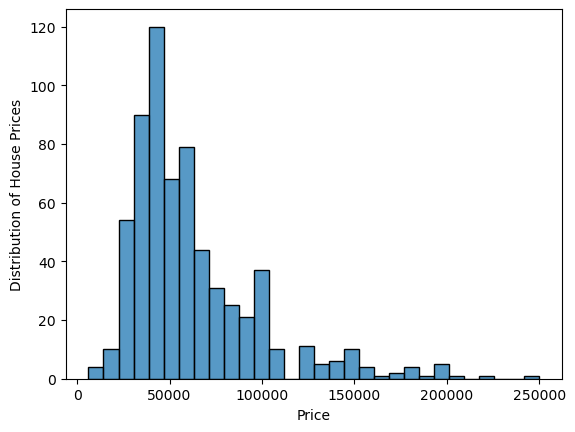

In [4]:
# Plot the distribution of the house prices
sns.histplot(data['Price'])
plt.xlabel("Price")
plt.ylabel("Distribution of House Prices")
plt.show()

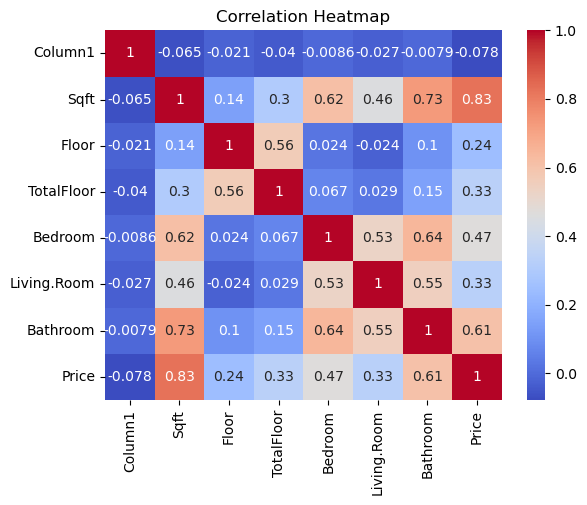

In [5]:
# Plot the correlation matrix of the data
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Manage data for training & testing

In [6]:
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = data.drop(['Price'], axis=1)
y = data['Price']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Finding a better value of k 

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def find_best_k(X_train, y_train, X_test, y_test, k_values):
    best_k = 0
    best_mse = float('inf')
    mse_values = []
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
        
        if mse < best_mse:
            best_k = k
            best_mse = mse
    
    return best_k, mse_values

# Define a range of k values to try
k_values = list(range(1, 10))

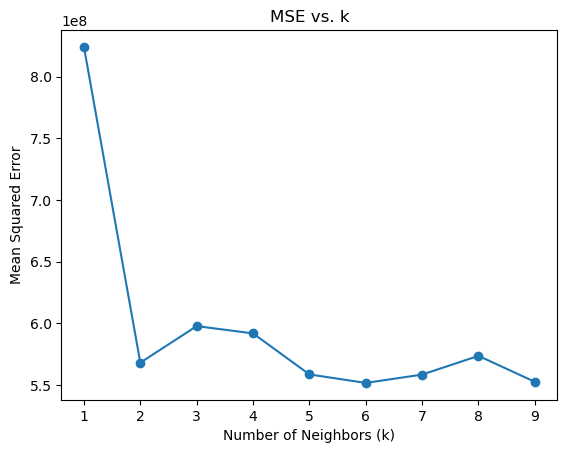

The best value of k is: 6


In [9]:
# Find the best value of k
best_k, mse_values = find_best_k(X_train_scaled, y_train, X_test_scaled, y_test, k_values)

# Plot the MSE values for different k values
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. k')
plt.xticks(k_values)
plt.show()

print(f"The best value of k is: {best_k}")